### Install Procsim

In [1]:
!pip install procsimulator==0.0.7

### Import Modules

In [1]:
import procsimulator
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.ConsumptionGenerator import ConsumptionGenerator
from procsimulator.DataFromSmile import DataFromSmile
from procsimulator.DataFromTomorrow import DataFromTomorrow
from procsimulator.RenewableEnergyGenerator import RenewableEnergyGenerator
from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.Evaluation import Evaluation

### Get current path

In [3]:
current_path = os.getcwd()
print(current_path)

C:\Users\Nuno.Velosa.CORP\OneDrive - Unipartner IT Services, S.A\Desktop\pyomo_experiments\paper_experiments


### Generation of the consumption profiles

In [4]:
path_steps_seconds = os.path.join(current_path, "..")
path_steps_minutes = "../output/minute"

In [5]:
cg = ConsumptionGenerator("../data.json", path_steps_seconds, path_steps_minutes)
#cg.execute("1", "houses", True, False)

### Generation of PV and Wind Production

In [6]:
pv_dat = DataFromSmile("https://ems.prsma.com/solcast/public/Fazendinha_solcast-radiation-historical_30min.csv")
wind_dat = DataFromTomorrow("https://api.tomorrow.io/v4/timelines?location=-73.98529171943665,40.75872069597532&fields=pressureSurfaceLevel,pressureSeaLevel,precipitationIntensity,precipitationType,windSpeed,windGust,windDirection,temperature,temperatureApparent,cloudCover,cloudBase,cloudCeiling,weatherCode&timesteps=1h&units=metric&apikey=Yckmp3vREbJqyprWGGiTOC1pVaAYO0ZT")
reg = RenewableEnergyGenerator(cg, pv_dat, wind_dat, cg.path_steps_minutes)

#reg.execute()

### Calculation of netload and Generation of the EC dataset

In [7]:
cmg = CommunityGenerator(cg.path_steps_minutes)
cmg.execute()

Calculating netload of the community


ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

### Calculate metrics in the EC dataset

In [55]:
df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
#baseload = cg.calculate_contracted_power(community)
evaluation = Evaluation(reg, df, 0)

print("Average Power Used from Grid: " + "{:.2f}".format(evaluation.get_average_power_used_from_grid()) + " kW")
print("Average Power Used from PV: " + "{:.2f}".format(evaluation.get_average_power_used_from_pv()) + " kW")
print("Average Power Not Used from PV: " + "{:.2f}".format(evaluation.get_average_power_not_used_from_pv()) + " kW")
print("Energy Used from Grid: " + "{:.2f}".format(evaluation.get_energy_used_from_grid()) + " kWh")
print("Energy Used from PV: " + "{:.2f}".format(evaluation.get_energy_used_from_pv()) + " kWh")
print("Energy Not Used from PV: " + "{:.2f}".format(evaluation.get_energy_not_used_from_pv()) + " kWh")
print("Peaks Number: " + str(evaluation.get_peaks_number()))
print("Self Sufficiency (SS): " + "{:.2f}".format(evaluation.get_self_sufficiency()*100) + "%")
print("Self Consumption (SC): " + "{:.2f}".format(evaluation.get_self_consumption()*100) + "%")

Average Power Used from Grid: 1.26 kW
Average Power Used from PV: 1.87 kW
Average Power Not Used from PV: 2.29 kW
Energy Used from Grid: 30.24 kWh
Energy Used from PV: 44.90 kWh
Energy Not Used from PV: 54.95 kWh
Peaks Number: 525
Self Sufficiency (SS): 59.76%
Self Consumption (SC): 44.97%


### Calculation of Community PPC

In [9]:
# Getting the community contracted power
community = cg.get_community()
print("Contracted Power: " + str(cg.calculate_contracted_power(community)))

Calculating the contracted power of the community
Contracted Power: 29900.0


### Community activities

In [57]:
cg.get_timeslots(community, True)

Creating the Timeslots of the community


[{'Start': '2022-10-12 10:48:00',
  'End': '2022-10-12 11:00:00',
  'Duration': '12',
  'max_power': 1135.5866666666668,
  'Power': 854.6416666666667,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-10-12 17:07:00',
  'End': '2022-10-12 17:19:00',
  'Duration': '12',
  'max_power': 1137.1583333333333,
  'Power': 513.02,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-10-12 08:37:00',
  'End': '2022-10-12 11:48:00',
  'Duration': '11',
  'max_power': 2935.026666666666,
  'Power': 6.25,
  'Appliance': 'WASHINGMACHINE',
  'House': 0},
 {'Start': '2022-10-12 20:11:00',
  'End': '2022-10-12 20:40:00',
  'Duration': '29',
  'max_power': 897.0,
  'Power': 134.55,
  'Appliance': 'COOKINGSTOVE',
  'House': 0},
 {'Start': '2022-10-12 14:33:00',
  'End': '2022-10-12 14:45:00',
  'Duration': '12',
  'max_power': 1135.8733333333334,
  'Power': 797.7283333333332,
  'Appliance': 'VACUUMCLEANER',
  'House': 1},
 {'Start': '2022-10-12 15:03:00',
  'End': '2022-10-12 15:1

### Get the community netload

In [58]:
community_df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
community_df.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']
community_df['Date'] = pd.to_datetime(community_df['Date'])
community_df.set_index('Date')

,Demand,PV_Production,Wind_Production,Production,Netload
Date,,,,,
2022-10-12 00:00:00,1364.146667,0.0,2990.000000,2990.000000,-1625.853333
2022-10-12 00:01:00,1363.206667,0.0,2990.027616,2990.027616,-1626.820949
2022-10-12 00:02:00,1340.268333,0.0,2989.972909,2989.972909,-1649.704575
2022-10-12 00:03:00,1455.428333,0.0,2989.836683,2989.836683,-1534.408350
2022-10-12 00:04:00,1466.303333,0.0,2989.619742,2989.619742,-1523.316409
...,...,...,...,...,...
2022-10-12 23:54:00,3374.000000,0.0,1589.130212,1589.130212,1784.869788
2022-10-12 23:55:00,3515.371667,0.0,1588.667798,1588.667798,1926.703869
2022-10-12 23:56:00,3363.616667,0.0,1588.272937,1588.272937,1775.343729


### Plot Consumption

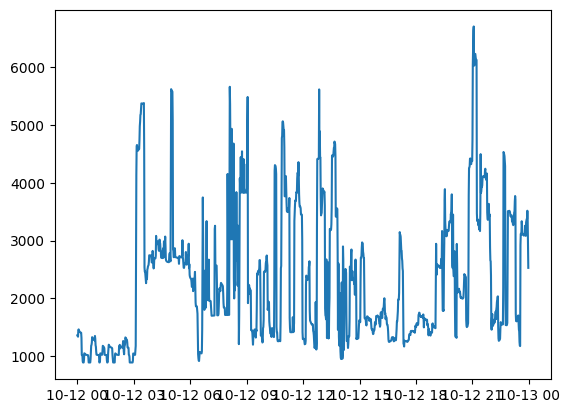

In [59]:
plt.plot(community_df["Date"], community_df["Demand"])
plt.show()

### Plot Flexible Consumption

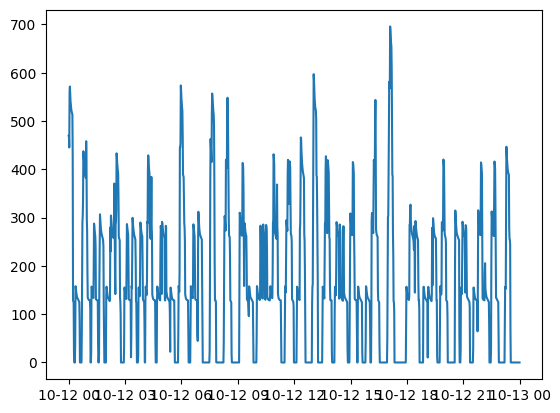

In [60]:
flexible_df = pd.read_csv(path_steps_minutes + '/community_baseload.csv', sep=';')
flexible_df.columns = ['Date', 'Power']
flexible_df['Date'] = pd.to_datetime(flexible_df['Date'])
flexible_df.set_index('Date')

plt.plot(flexible_df["Date"], flexible_df["Power"])
plt.show()

### Plot Unflexible Consumption

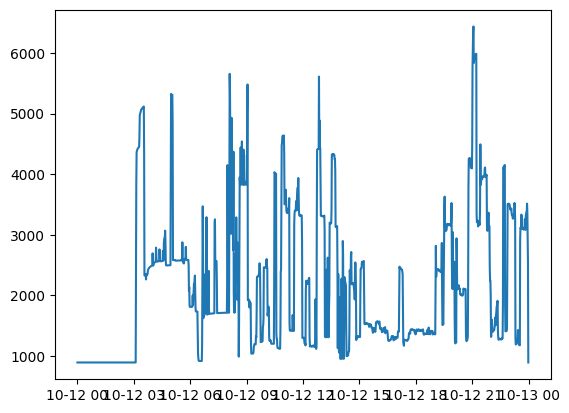

In [61]:
unflexible_df = pd.read_csv(path_steps_minutes + '/community_not_baseload.csv', sep=';')
unflexible_df.columns = ['Date', 'Power']
unflexible_df['Date'] = pd.to_datetime(unflexible_df['Date'])
unflexible_df.set_index('Date')

plt.plot(unflexible_df["Date"], unflexible_df["Power"])
plt.show()

### Plot PV Production

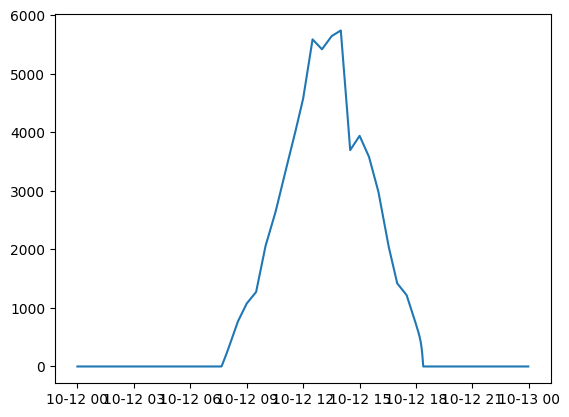

In [71]:
plt.plot(community_df["Date"], community_df["PV_Production"])
plt.show()

### Plot Wind Production

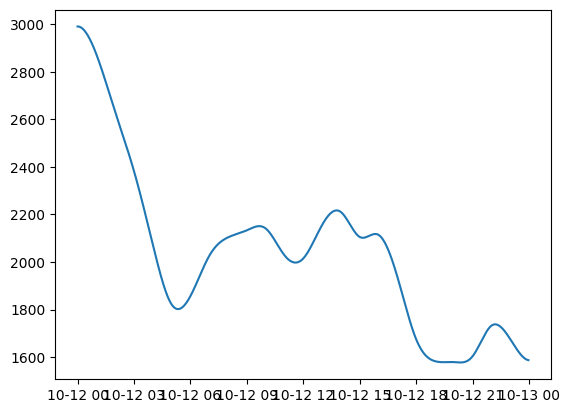

In [72]:
plt.plot(community_df["Date"], community_df["Wind_Production"])
plt.show()

### Plot Total Production

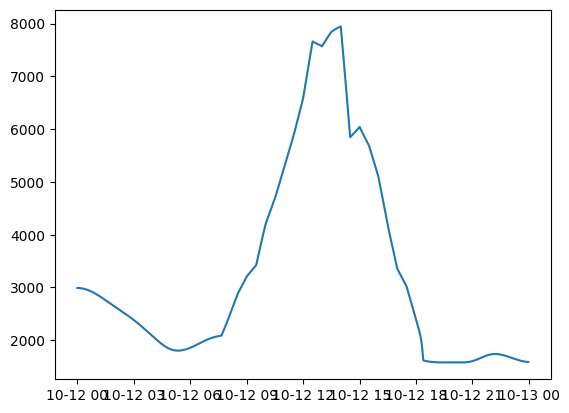

In [73]:
plt.plot(community_df["Date"], community_df["Production"])
plt.show()

### Plot Community Netload

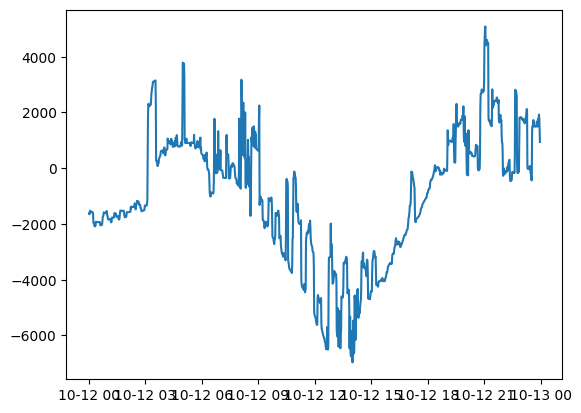

In [63]:
plt.plot(community_df["Date"], community_df["Netload"])
plt.show()

### Plot consumption of House 3

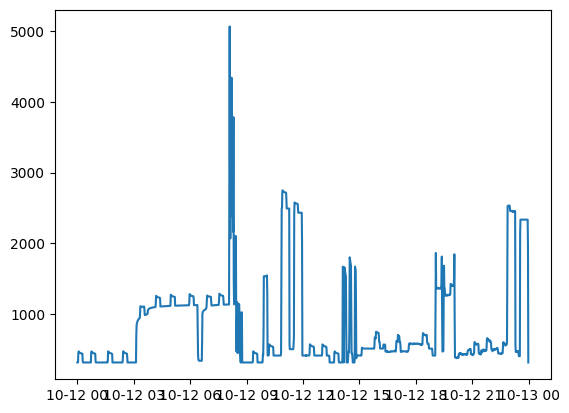

In [64]:
house3_total_df = pd.read_csv(path_steps_minutes + '/house3/total.csv', sep=';')
house3_total_df.columns = ['Date', 'Power']
house3_total_df['Date'] = pd.to_datetime(house3_total_df['Date'])
house3_total_df.set_index('Date')

plt.plot(house3_total_df["Date"], house3_total_df["Power"])
plt.show()

### Plot consumption of DW of House 4

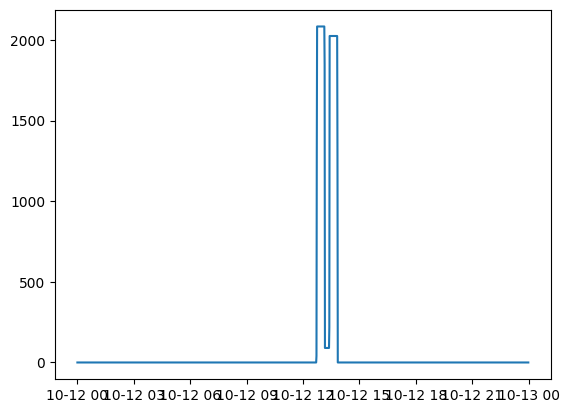

In [65]:
house4_wm_df = pd.read_csv(path_steps_minutes + '/house4/DISHWASHER.csv', sep=';')
house4_wm_df.columns = ['Date', 'Power']
house4_wm_df['Date'] = pd.to_datetime(house4_wm_df['Date'])
house4_wm_df.set_index('Date')

plt.plot(house4_wm_df["Date"], house4_wm_df["Power"])
plt.show()

### Plot consumption of Refrigerator of House 2

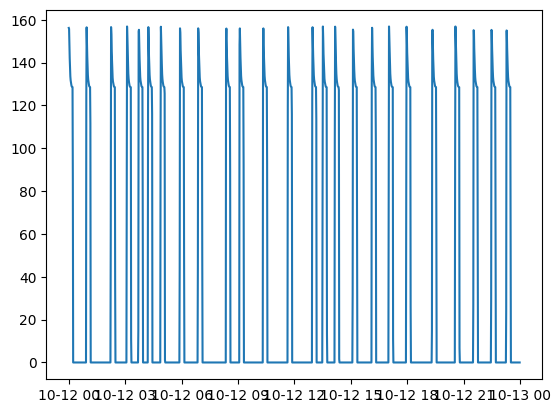

In [66]:
house2_refrigerator_df = pd.read_csv(path_steps_minutes + '/house2/REFRIGERATOR.csv', sep=';')
house2_refrigerator_df.columns = ['Date', 'Power']
house2_refrigerator_df['Date'] = pd.to_datetime(house2_refrigerator_df['Date'])
house2_refrigerator_df.set_index('Date')

plt.plot(house2_refrigerator_df["Date"], house2_refrigerator_df["Power"])
plt.show()

### Plot consumption of Cooking Dinner activity of House 1

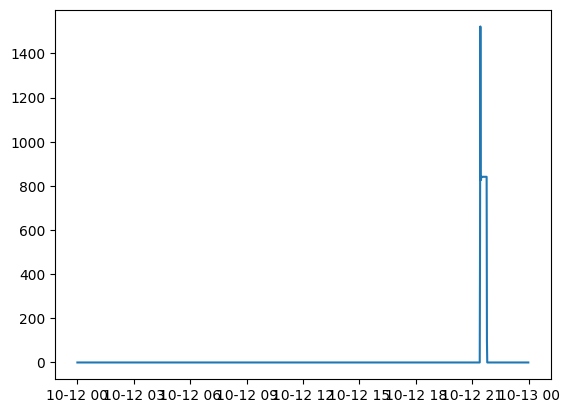

In [67]:
house1_dinner_df = pd.read_csv(path_steps_minutes + '/house1/cooking_a_dinner.csv', sep=';')
house1_dinner_df.columns = ['Date', 'Power']
house1_dinner_df['Date'] = pd.to_datetime(house1_dinner_df['Date'])
house1_dinner_df.set_index('Date')

plt.plot(house3_dinner_df["Date"], house1_dinner_df["Power"])
plt.show()

### Plot consumption of user Ann of House 2

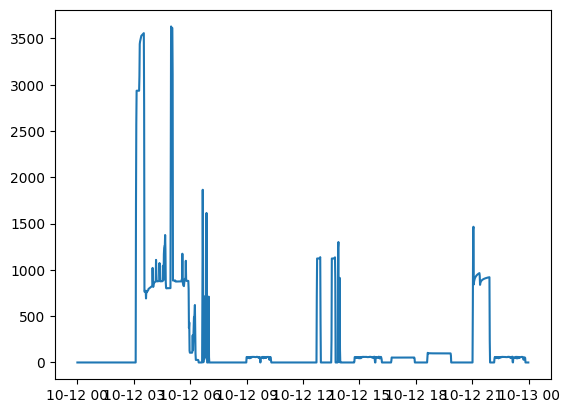

In [68]:
house2_ann_df = pd.read_csv(path_steps_minutes + '/house2/Ann.csv', sep=';')
house2_ann_df.columns = ['Date', 'Power']
house2_ann_df['Date'] = pd.to_datetime(house2_ann_df['Date'])
house2_ann_df.set_index('Date')

plt.plot(house2_ann_df["Date"], house2_ann_df["Power"])
plt.show()

### Plot consumption of user Bill of House 2

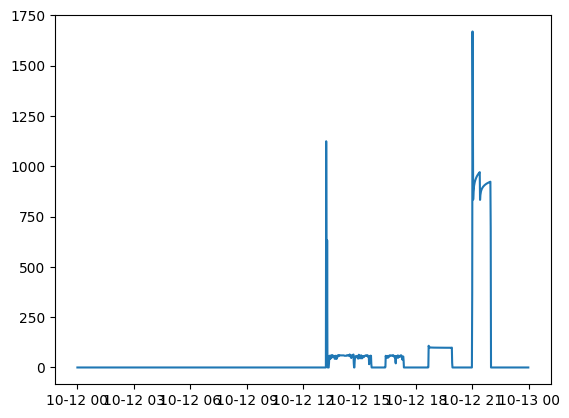

In [69]:
house2_bill_df = pd.read_csv(path_steps_minutes + '/house2/Bill.csv', sep=';')
house2_bill_df.columns = ['Date', 'Power']
house2_bill_df['Date'] = pd.to_datetime(house2_bill_df['Date'])
house2_bill_df.set_index('Date')

plt.plot(house2_bill_df["Date"], house2_bill_df["Power"])
plt.show()